# Project – Machine Learning-I (CSE 602)

# dataset_1 (Credit Card Fraud Detection)
#Alogorithm 1 used
#SMOTE
#LogisticRegression
#GridSearchCV
#KNN
#RandomForest
#CV
#ANN

In [127]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [49]:
#importing dataset
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
df = df.drop("Time", axis=1)

In [50]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [51]:
df.isnull().sum().sum()

0

In [52]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


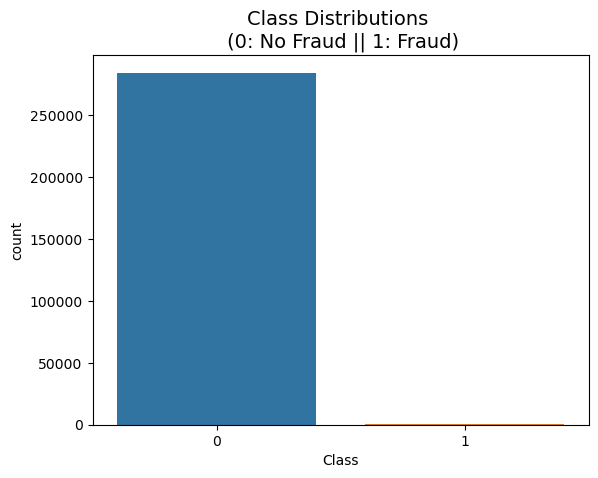

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the correct parameter 'data' to pass the data frame
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [58]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [59]:
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [60]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

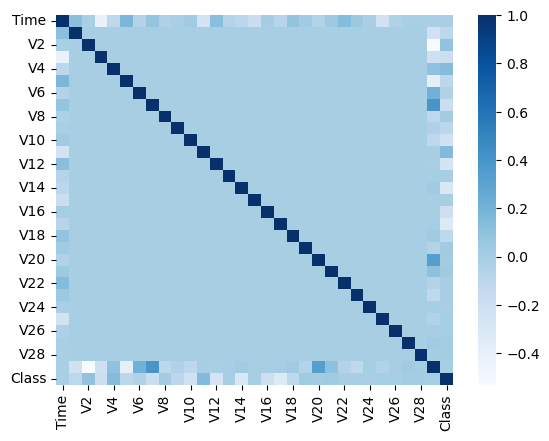

In [61]:
dfplot = sns.heatmap(df.corr(), cmap="Blues") 
plt.show() 

In [62]:
X = df.drop("Class", axis=1)
y = df['Class']

In [63]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [64]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [65]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [67]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [68]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

NameError: name 'SMOTE' is not defined

In [70]:
pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   --- ------------------------------------ 20.5/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 487.6 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.3 kB 558.5 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.3 kB 654.9 kB/s eta 0:00:01
   --------------------------- ---------- 184.3/258.3 kB 794.9 kB/s eta 0:00:01
   ---------------------------------- --- 235.5/258.3 kB 846.9 kB/s eta 0:00:01
   -------------------------------------  256.0/258.3 kB 871.5 kB/s eta 0:00:01
   --------------

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)
    
  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)

In [74]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model_LR = LogisticRegression()

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

clf_lsr_cv = GridSearchCV(model_LR,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9635166480756007


In [81]:
from sklearn.metrics import accuracy_score

In [83]:
from sklearn.metrics import recall_score

In [85]:
from sklearn.metrics import f1_score


In [87]:
from sklearn.metrics import confusion_matrix

LogisticRegression(C=1000.0, random_state=42)
Accuracy :  0.9991046662687406 Recall :  0.8133333333333334 F1 :  0.7052023121387283


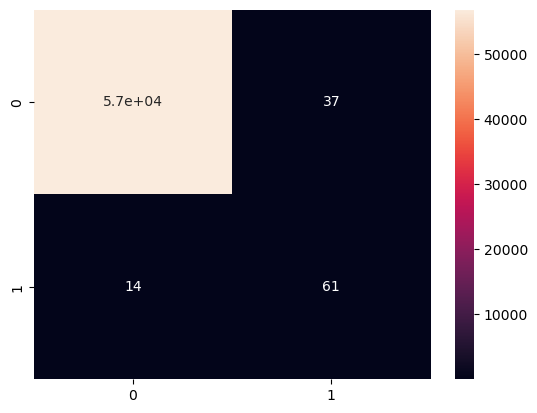

In [88]:
# Fitting the model with best parameters .

lsr_best = LogisticRegression(penalty='l2',C=1000.0,random_state = 42)
lsr_clf = lsr_best.fit(X_train,y_train)
evaluate(lsr_clf)

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
model_KNN = KNeighborsClassifier()

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
  model_KNN  = KNeighborsClassifier(n_neighbors=k)
  model_KNN .fit(X_train,y_train)
  score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

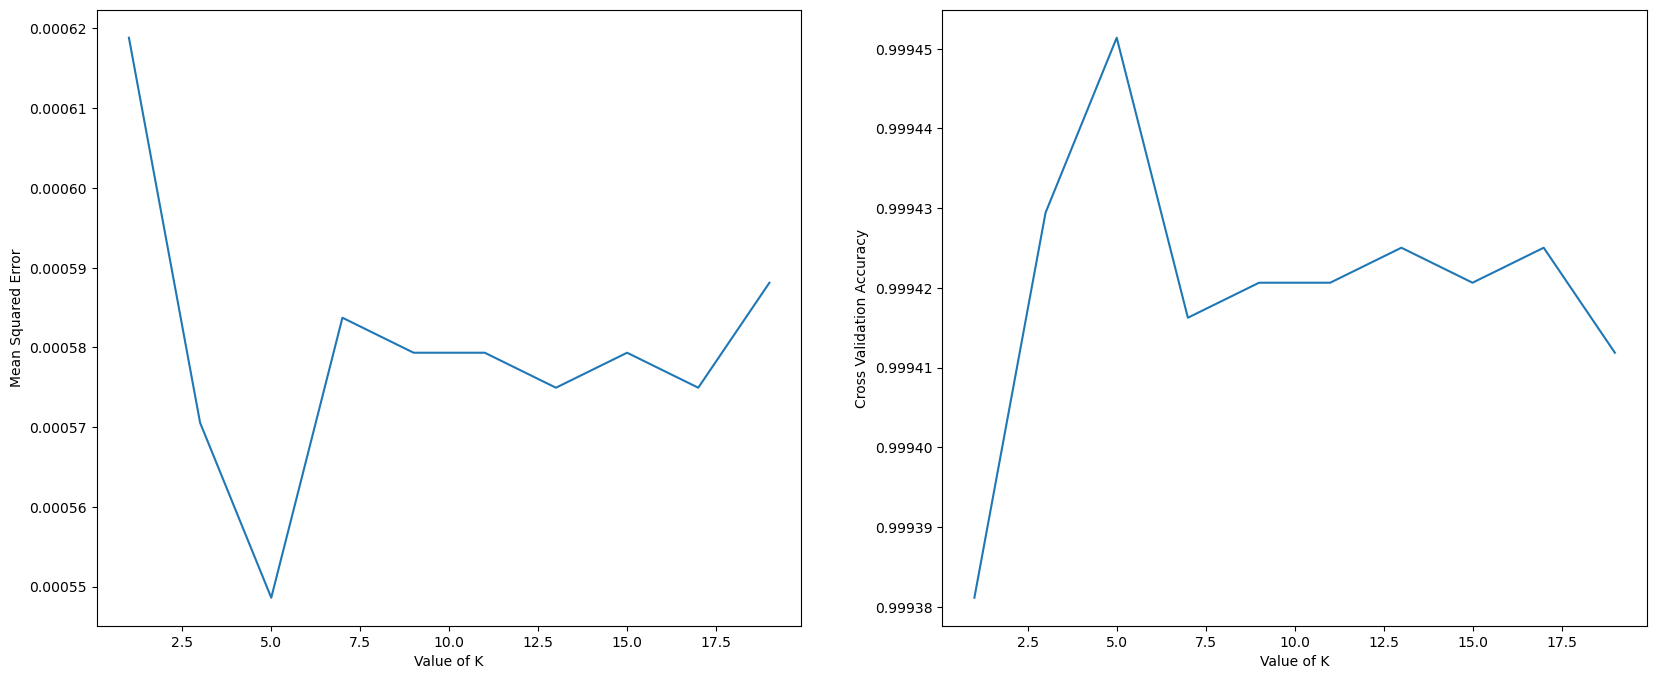

In [95]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

KNeighborsClassifier(n_neighbors=3)
Accuracy :  0.9995611109160493 Recall :  0.9620253164556962 F1 :  0.8587570621468926


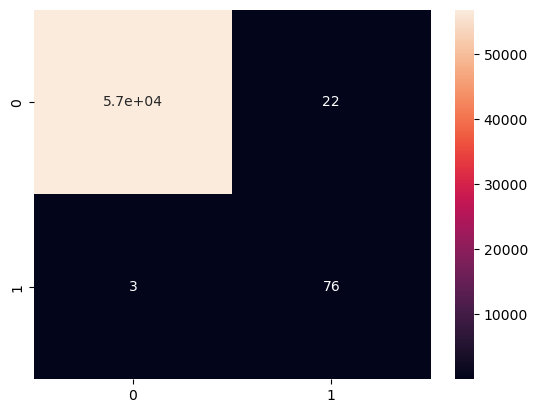

In [96]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [100]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
model_RFC = RandomForestClassifier()

# Fit the model
model_RFC.fit(X_train, y_train)

# Make predictions
predictions = model_RFC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9995786664794073


In [101]:
model_RFC = RandomForestClassifier()

In [102]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
clf_rfc_cv = GridSearchCV(model_RFC, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 50}
accuracy : 0.979131280307502


RandomForestClassifier(max_depth=9, n_estimators=50)
Accuracy :  0.9995962220427653 Recall :  0.9411764705882353 F1 :  0.8743169398907104


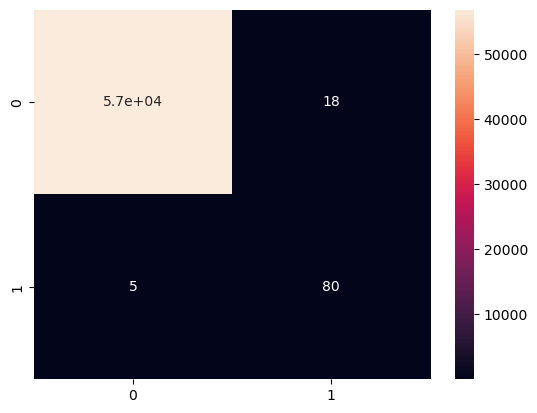

In [103]:
#Fitting model 

rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

evaluate(RFC_clf)

In [108]:
pip install keras tensorflow

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  

In [109]:
pip install keras tensorflow

Note: you may need to restart the kernel to use updated packages.


In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [112]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model_ANN = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model_ANN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
history = model_ANN.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9943 - loss: 0.0354 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 2/50
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 3/50
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9991 - val_loss: 0.0042
Epoch 4/50
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 5/50
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 6/50
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 7/50
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 8/50
2849/2849 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9993 - loss: 0.0037 - 

In [114]:
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [116]:
from sklearn.metrics import classification_report

In [117]:
from sklearn.metrics import classification_report

# Predict the labels using the model
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Print the classification report
print(classification_report(y_test, y_pred))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.83      0.79        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [118]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56855\n           1       0.83      0.76      0.79       107\n\n    accuracy                           1.00     56962\n   macro avg       0.91      0.88      0.89     56962\nweighted avg       1.00      1.00      1.00     56962\n'

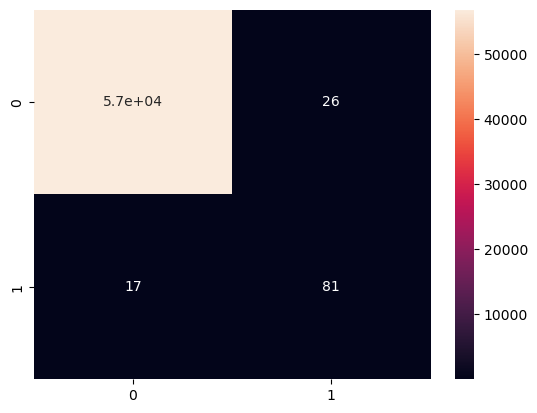

In [119]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [121]:
from sklearn.cluster import KMeans

In [122]:
# Importing the KMeans class from sklearn.cluster
from sklearn.cluster import KMeans

# Assuming X is already defined
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [123]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [124]:
X

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

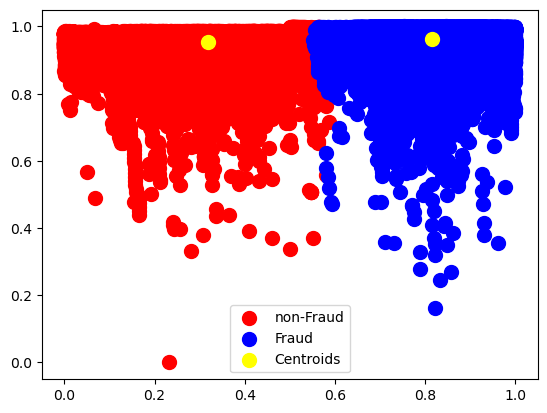

In [125]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'non-Fraud')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Fraud')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


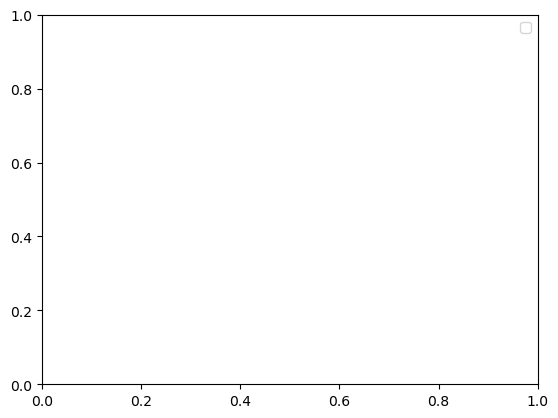

In [126]:
plt.legend()

In [128]:
#Algorithm 2
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Basic data preprocessing
df['normalized_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Splitting the dataset
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [129]:
#Algorithmic Methods (Class Weighting and Ensemble Methods)
#Class Weighting with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Logistic Regression with class weights
model_LR = LogisticRegression(class_weight='balanced', random_state=42)
model_LR.fit(X_train, y_train)
y_pred_lr = model_LR.predict(X_test)

print("Logistic Regression with Class Weighting")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression with Class Weighting
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

[[55423  1441]
 [    8    90]]


In [130]:
#Ensemble Methods with RandomForest
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
model_RFC = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_RFC.fit(X_train, y_train)
y_pred_rfc = model_RFC.predict(X_test)

print("Random Forest with Class Weighting")
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

Random Forest with Class Weighting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

[[56861     3]
 [   24    74]]


In [131]:
#One-Class SVM
from sklearn.svm import OneClassSVM

# One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
ocsvm.fit(X_train[y_train == 0])  # Train only on the majority class

y_pred_ocsvm = ocsvm.predict(X_test)
y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1)  # Invert predictions

print("One-Class SVM")
print(classification_report(y_test, y_pred_ocsvm))
print(confusion_matrix(y_test, y_pred_ocsvm))

One-Class SVM
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.89      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962

[[55058  1806]
 [   11    87]]


In [132]:
#Cluster-Based Over Sampling with SMOTE

from imblearn.over_sampling import SMOTE

# SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on SMOTE data
model_LR_smote = LogisticRegression(random_state=42)
model_LR_smote.fit(X_train_smote, y_train_smote)
y_pred_smote_lr = model_LR_smote.predict(X_test)

print("Logistic Regression with SMOTE")
print(classification_report(y_test, y_pred_smote_lr))
print(confusion_matrix(y_test, y_pred_smote_lr))

Logistic Regression with SMOTE
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

[[55355  1509]
 [    8    90]]


In [133]:
from sklearn.preprocessing import PolynomialFeatures

# Adding interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Logistic Regression on polynomial features
model_LR_poly = LogisticRegression(random_state=42)
model_LR_poly.fit(X_train_poly, y_train)
y_pred_poly_lr = model_LR_poly.predict(X_test_poly)

print("Logistic Regression with Polynomial Features")
print(classification_report(y_test, y_pred_poly_lr))
print(confusion_matrix(y_test, y_pred_poly_lr))


Logistic Regression with Polynomial Features
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.80      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56848    16]
 [   20    78]]
